In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [3]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../data')

train_df = shuffle(train_df)
valid_df = shuffle(valid_df)

print(train_df.head())


                                                image                   id  \
2352  ../data/Train/CameraRGB/episode_0004_000078.png  episode_0004_000078   
1164                  ../data/Train/CameraRGB/304.png                  304   
625   ../data/Train/CameraRGB/episode_0000_000011.png  episode_0000_000011   
2241  ../data/Train/CameraRGB/episode_0000_000001.png  episode_0000_000001   
1686                  ../data/Train/CameraRGB/307.png                  307   

                                                label  
2352  ../data/Train/CameraSeg/episode_0004_000078.png  
1164                  ../data/Train/CameraSeg/304.png  
625   ../data/Train/CameraSeg/episode_0000_000011.png  
2241  ../data/Train/CameraSeg/episode_0000_000001.png  
1686                  ../data/Train/CameraSeg/307.png  


In [5]:
from models.fcn8 import model_fcn8

model = model_fcn8(3, image_shape=(480, 480, 3), keep_prob=0.5)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 480, 480, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 480, 480, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 480, 480, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 240, 240, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [7]:
from gen.generators import train_and_lab_gen_func

BATCH_SIZE = 32
model_dir = '../saved_models/fcn8_weighted/'

train_gen = train_and_lab_gen_func(train_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE)
valid_gen = train_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE)
# test_gen = train_and_lab_gen_func(test_df, image_size=(600, 800),  target_size=(480, 480),  batch_size = BATCH_SIZE)

In [10]:
from train import weighted_categorical_crossentropy
from keras.utils.training_utils import multi_gpu_model

weights = np.array([10, 5, 1])

gpus = 2

model_gpu = multi_gpu_model(model, gpus)
model_gpu.compile(loss=weighted_categorical_crossentropy(weights),
              optimizer='adam',
              metrics=['accuracy'])


In [11]:
from train import train_nn

m = train_df.shape[0]
history = train_nn(model_gpu, 
                   train_gen, 
                   valid_gen, 
                   training_size=m, 
                   batch_size=BATCH_SIZE,
                   validation_size=valid_df.shape[0],
                   output_path=model_dir, 
                   epochs=100,
                  gpus = 2)

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replace

Epoch 31/100
39/39 [==============================] - 96s 2s/step - loss: 0.3081 - acc: 0.9861 - val_loss: 0.6963 - val_acc: 0.9787

Epoch 00031: val_loss improved from 0.70836 to 0.69633, saving model to ../saved_models/fcn8_weighted//model.hdf5
Epoch 32/100
39/39 [==============================] - 97s 2s/step - loss: 0.3248 - acc: 0.9851 - val_loss: 0.7253 - val_acc: 0.9786

Epoch 00032: val_loss did not improve
Epoch 33/100
39/39 [==============================] - 87s 2s/step - loss: 0.3156 - acc: 0.9855 - val_loss: 0.7425 - val_acc: 0.9765

Epoch 00033: val_loss did not improve
Epoch 34/100
39/39 [==============================] - 96s 2s/step - loss: 0.3102 - acc: 0.9857 - val_loss: 0.8114 - val_acc: 0.9777

Epoch 00034: val_loss did not improve
Epoch 35/100
39/39 [==============================] - 95s 2s/step - loss: 0.2956 - acc: 0.9863 - val_loss: 0.6454 - val_acc: 0.9785

Epoch 00035: val_loss improved from 0.69633 to 0.64538, saving model to ../saved_models/fcn8_weighted//mode


Epoch 00068: val_loss improved from 0.17942 to 0.15478, saving model to ../saved_models/fcn8_weighted//model.hdf5
Epoch 69/100
39/39 [==============================] - 94s 2s/step - loss: 0.0682 - acc: 0.9869 - val_loss: 0.1665 - val_acc: 0.9778

Epoch 00069: val_loss did not improve
Epoch 70/100
39/39 [==============================] - 95s 2s/step - loss: 0.0658 - acc: 0.9873 - val_loss: 0.1607 - val_acc: 0.9787

Epoch 00070: val_loss did not improve
Epoch 71/100
39/39 [==============================] - 96s 2s/step - loss: 0.0660 - acc: 0.9872 - val_loss: 0.1629 - val_acc: 0.9726

Epoch 00071: val_loss did not improve
Epoch 72/100
39/39 [==============================] - 96s 2s/step - loss: 0.0689 - acc: 0.9868 - val_loss: 0.1856 - val_acc: 0.9791

Epoch 00072: val_loss did not improve
Epoch 73/100
39/39 [==============================] - 91s 2s/step - loss: 0.0646 - acc: 0.9874 - val_loss: 0.1803 - val_acc: 0.9711

Epoch 00073: val_loss did not improve
Epoch 74/100
39/39 [==========

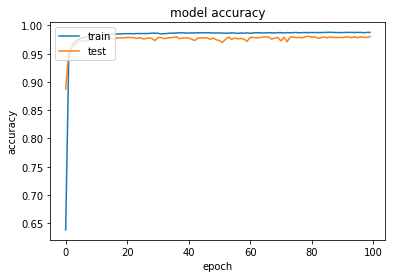

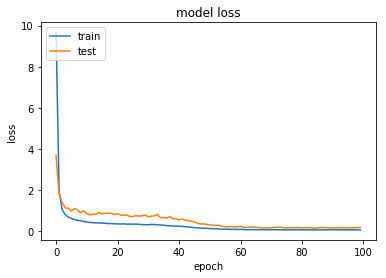

In [12]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.save('../saved_models/fcn8_weighted/model_saved.h5')

In [ ]:
#valid_gen = train_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE * gpus)
#test_gen = train_and_lab_gen_func(test_df, image_size=(600, 800),  target_size=(480, 480),  batch_size = BATCH_SIZE * gpus)